In [1]:
import pypianoroll as pr
import tensorflow as tf
import numpy as np
import os

In [2]:
def load_data(folder):
    for filename in os.listdir(folder):
        print(os.path.join(folder, filename))
        return pr.parse(os.path.join(folder, filename))
        break
        

In [11]:
midi = pr.parse('./data/jazz/Chelsea Bridge.mid')
#midi.trim_trailing_silence()
midi.tempo.shape

(4800,)

(<matplotlib.figure.Figure at 0x115c6ef10>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x115c6e550>])

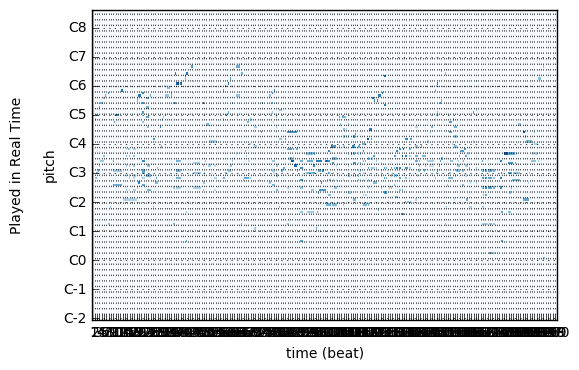

In [12]:
midi.plot()

In [13]:
dat = load_data('./data/jazz/')

./data/jazz/Chelsea Bridge.mid


In [5]:
datY = dat.tracks[0].pianoroll / 128.

In [7]:
datY.shape

(4800, 128)

In [8]:
dat.binarize()
datX = dat.tracks[0].pianoroll

In [10]:
datX.shape

(4800, 128)

In [144]:
datX = datX.reshape(48, 100, 128)
datY = datY.reshape(48, 100, 128)

In [161]:
class genModel():
    def __init__(self):
        self.input_size = 128
        self.hidden_unit = 256
        self.output_size = 128
        self.keep_prob = 0.8
    
    def simpleLSTM(self):
    
    
        # reset graph
        tf.reset_default_graph()
    
        # input output unit    
        self.inputs = tf.placeholder(tf.float32, (None, None, input_size))
        self.true_outputs = tf.placeholder(tf.float32, (None, None, output_size))
    
    
    
        # length of each piece of music
        self.seq_len = tf.placeholder(tf.int32, [None])
    
        # lstm cell with dropouts
        self.lstm_cell = tf.contrib.rnn.LSTMCell(self.hidden_unit)
        self.lstm_cell = tf.contrib.rnn.DropoutWrapper(self.lstm_cell,
                                                  input_keep_prob=self.keep_prob, 
                                                  output_keep_prob=self.keep_prob)

        # link lstm cells
        self.lstm_out, self.lstm_state = tf.nn.dynamic_rnn(self.lstm_cell, 
                                                 self.inputs, 
                                                 sequence_length = self.seq_len,
                                                 dtype = tf.float32)

        # output layer
        self.W = tf.get_variable("W", shape=(self.input_size, self.hidden_unit), initializer=tf.contrib.layers.xavier_initializer())
        self.b = tf.get_variable("b", shape=(self.input_size, 1), initializer=tf.zeros_initializer())

        # reshape lstm out to [hidden_unit, None], prepare for matrix multiplication
        self.z = tf.transpose(tf.reshape(self.lstm_out, (-1, self.hidden_unit)))
        self.z = tf.matmul(self.W, self.z) + self.b

        # use sigmoid function to map between [0, 1] as the input velocity has been mapped to [0, 1]
        self.y_pred = tf.sigmoid(self.z)

        # reshape true_outputs to the same dimension
        self.y_true = tf.transpose(tf.reshape(self.true_outputs, (-1, self.output_size)))

        # loss
        self.cost = tf.reduce_sum(tf.square(self.y_true - self.y_pred))
        
    
    def train_batch(self, datX, datY, epochs=100):
        
        m = datX.shape[0]
        Tx = datX.shape[1]
        seq_len = [Tx] * m
        
        self.optimizer = tf.train.AdamOptimizer().minimize(self.cost)
        
        init = tf.global_variables_initializer()
        
        with tf.Session() as sess:
        
            # Run the initialization
            sess.run(init)
        
            # Do the training loop
            for epoch in range(epochs):
                opt, cost = sess.run([self.optimizer, self.cost], 
                             feed_dict={
                                 self.inputs : datX,
                                 self.true_outputs: datY,
                                 self.seq_len : seq_len
                             })                
                print opt, cost
                
            y_pred = sess.run([self.y_pred], 
                     feed_dict={
                     self.inputs : datX,
                     self.seq_len : seq_len
                     })
        return y_pred
                
    def predict(self, datX):
        
        m = datX.shape[0]
        Tx = datX.shape[1]
        seq_len = [Tx] * m
    
        with tf.Session() as sess:
            return sess.run([self.y_pred], 
                         feed_dict={
                         self.inputs : datX,
                         self.seq_len : seq_len
                     })


        

In [61]:
d = pr.parse('./data/classical/bach_846_format0.mid')
x = d.copy()
x.binarize()
y = d

In [162]:
model = genModel()
#lstm_out, lstm_state, y, true_y, loss = genModel(1)
model.simpleLSTM()

In [175]:
pred_y = model.train_batch(datX, datY, 1000)

None 151229.0
None 149473.0
None 147228.0
None 142777.0
None 130826.0
None 106533.0
None 85137.9
None 68945.4
None 55617.8
None 44720.4
None 35562.3
None 28232.0
None 22590.6
None 18371.5
None 15257.3
None 12961.0
None 11476.9
None 10351.5
None 9572.83
None 8881.64
None 8453.44
None 8012.98
None 7695.05
None 7442.89
None 7288.73
None 7014.65
None 6946.24
None 6796.17
None 6726.08
None 6567.83
None 6509.51
None 6388.4
None 6371.77
None 6257.36
None 6224.89
None 6172.02
None 6096.06
None 6065.25
None 5925.66
None 5943.77
None 5834.08
None 5939.72
None 5810.88
None 5703.72
None 5736.44
None 5725.45
None 5700.92
None 5626.76
None 5695.75
None 5651.68
None 5577.54
None 5534.86
None 5565.6
None 5459.24
None 5450.42
None 5412.69
None 5454.41
None 5378.09
None 5457.47
None 5394.91
None 5390.66
None 5296.85
None 5244.87
None 5307.92
None 5306.17
None 5282.34
None 5221.85
None 5227.34
None 5185.87
None 5244.88
None 5180.53
None 5160.22
None 5176.95
None 5158.17
None 5124.9
None 5100.8
None 5146.

None 2583.75
None 2603.32
None 2586.78
None 2575.8
None 2579.05
None 2565.96
None 2587.3
None 2589.85
None 2595.7
None 2587.1
None 2593.73
None 2575.4
None 2576.69
None 2557.62
None 2559.92
None 2572.46
None 2544.91
None 2554.11
None 2577.02
None 2570.64
None 2568.6
None 2530.56
None 2571.46
None 2537.14
None 2556.04
None 2536.39
None 2560.94
None 2570.06
None 2555.63
None 2552.47
None 2534.14
None 2581.23
None 2529.58
None 2545.94
None 2527.65
None 2552.32
None 2535.3
None 2535.67
None 2528.73
None 2523.13
None 2525.24
None 2540.07
None 2508.12
None 2524.38
None 2503.0
None 2571.87
None 2507.54
None 2561.42
None 2508.58
None 2513.81
None 2515.87
None 2492.27
None 2529.98
None 2501.71
None 2487.44
None 2488.46
None 2508.31
None 2486.22
None 2497.51
None 2515.88
None 2473.65
None 2520.26
None 2497.84
None 2481.86
None 2461.92
None 2490.62
None 2490.92
None 2500.1
None 2480.75
None 2506.85
None 2492.63
None 2471.72
None 2481.82
None 2459.36
None 2499.68
None 2458.54
None 2523.8
None 2475

In [176]:
yy = np.reshape(np.transpose(pred_y[0]), (48, 100, 128))

In [177]:
np.max(np.abs((datY-yy)*128))

116.99945446540369

In [109]:
adam = tf.train.AdamOptimizer().minimize(loss)

In [ ]:
with tf.Session() as sess:
    sess.run([adam], feed_dict={inputs: datX, ou})

In [ ]:
tf.

In [20]:
lstm_out_reshape = tf.reshape(lstm_out, (-1, hidden_unit))

In [21]:
z = tf.matmul(W, lstm_out_reshape)

In [22]:
z = z + b

In [23]:
y = tf.sigmoid(z) * 127

In [24]:
y

<tf.Tensor 'mul:0' shape=(128, 256) dtype=float32>